In [7]:
!pip install opencv-python numpy matplotlib scikit-learn

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Using cached scikit_learn-1.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 32.8 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


# Thresholding

In [10]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

_, prev_frame = cap.read()
prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
prev_frame = cv2.GaussianBlur(prev_frame, (21, 21), 0)

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)

    delta_frame = cv2.absdiff(prev_frame, gray)
    threshold_frame = cv2.threshold(delta_frame, 30, 255, cv2.THRESH_BINARY)[1]
    threshold_frame = cv2.dilate(threshold_frame, None, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(threshold_frame.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) < 1000:
            continue
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 3)

    cv2.imshow("Frame", frame)
    cv2.imshow("Threshold Frame", threshold_frame)

    key = cv2.waitKey(1)
    if key == ord('q'):
        break

    prev_frame = gray

cap.release()
cv2.destroyAllWindows()


# K-Means Clustering

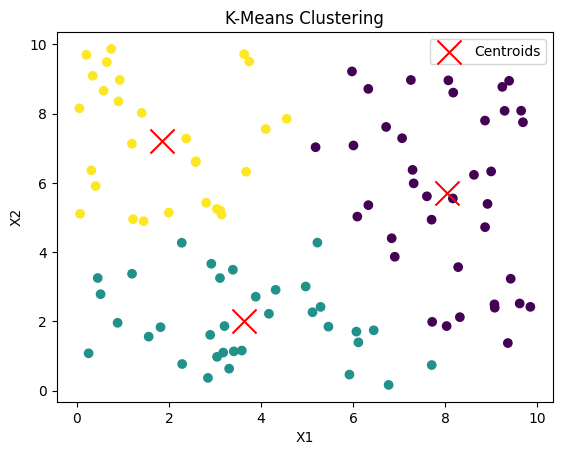

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 2) * 10

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


In [9]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 2.6 MB/s eta 0:00:000m eta -:--:--


# Fuzzy C-Means Clustering

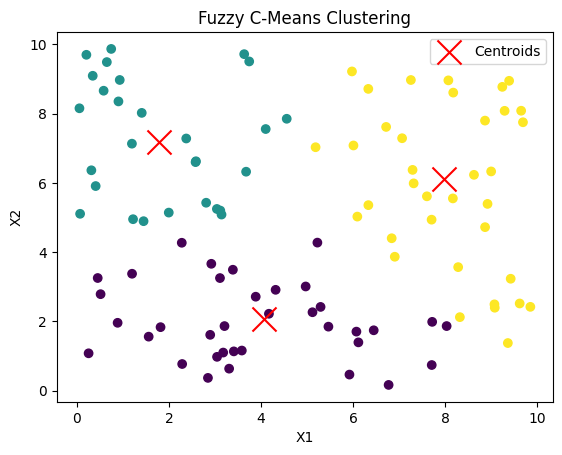

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 2) * 10
X = np.transpose(X)  # Transpose to match skfuzzy format

# Perform Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X, c=3, m=2, error=0.005, maxiter=1000, init=None)

# Hard clustering by selecting the highest membership value
cluster_labels = np.argmax(u, axis=0)

# Plot the results
plt.scatter(X[0, :], X[1, :], c=cluster_labels, cmap='viridis')
plt.scatter(cntr[:, 0], cntr[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title("Fuzzy C-Means Clustering")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


# Morphological Operations – Erosion, Dilation, Opening and Closing

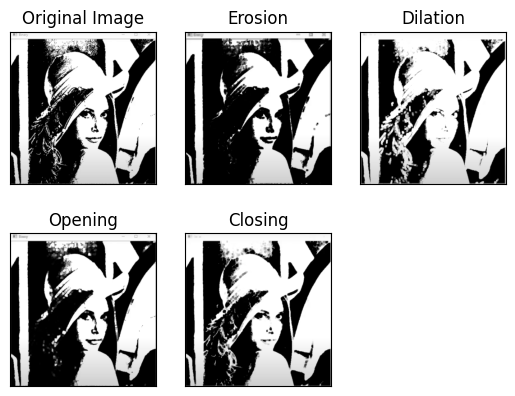

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a binary image
image = cv2.imread('Binary_Image.png', 0)

# Create a structuring element
kernel = np.ones((5, 5), np.uint8)

# Erosion
erosion = cv2.erode(image, kernel, iterations=1)

# Dilation
dilation = cv2.dilate(image, kernel, iterations=1)

# Opening (Erosion followed by Dilation)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Closing (Dilation followed by Erosion)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the results
titles = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [image, erosion, dilation, opening, closing]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


# PIL

In [ ]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageOps

# open an image file
img = Image.open('PIL\image.jpg')

# display image dimensions and format
print('Image format:', img.format)
print('Image size:', img.size)

# crop image
crop_box = (100, 100, 300, 300)
cropped_img = img.crop(crop_box)
cropped_img.save('PIL\cropped_image.jpg')

# resize image
resize_img = img.resize((400, 400))
resize_img.save('PIL\\resized_image.jpg')

# rotate image
rotated_img = img.rotate(45)
rotated_img.save('PIL\\rotated_image.jpg')

# convert image to grayscale
gray_img = img.convert('L')
gray_img.save('PIL\gray_image.jpg')

# apply filter to image
filtered_img = img.filter(ImageFilter.GaussianBlur(radius=10))
filtered_img.save('PIL\\filtered_image.jpg')

# flip image
flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)
flipped_img.save('PIL\\flipped_image.jpg')

# create new image
new_img = Image.new('RGB', (400, 400), color=(255, 255, 255))

# draw on image
draw = ImageDraw.Draw(new_img)
draw.text((100, 100), 'Hello, World!', fill=(0, 0, 0))
draw.line([(0, 0), (400, 400)], fill=(255, 0, 0), width=5)
draw.rectangle([(50, 50), (350, 350)], outline=(0, 255, 0), width=2)

# add border to image
bordered_img = ImageOps.expand(new_img, border=10, fill=(255, 0, 0))
bordered_img.save('PIL\\bordered_image.jpg')